In [ ]:
#https://mubaris.com/posts/movie-analysis/

# Imports

In [2]:
import pysrt
from datetime import date, datetime, timedelta, time
import pysrt
from textblob import TextBlob
import matplotlib
from matplotlib import style
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (16.0, 9.0)
style.use('fivethirtyeight')


# Handling srt Subtitles

In [3]:
# Loading the Subtitle
subs = pysrt.open('/home/mscuser/multimodal/multimodal_audio/Joey Bada$$ Talks Style, Activism, and Crystals-iY6dw9dEqfo.en.srt')
subtitles={}
len_subs=len(subs)
for i in range(len_subs):
    sub = subs[i]

    # Subtitle text
    text = sub.text
    text_without_tags = sub.text_without_tags

    # Start and End time
    start = sub.start.to_time()
    end = sub.end.to_time()
    subtitles[i]=[[text,text_without_tags,start,end]]
# Removing line and saving
#del subs[index]
#subs.save('/home/mscuser/multimodal/multimodal_audio/Joey Bada$$ Talks Style, Activism, and Crystals-iY6dw9dEqfo.en.srt')

In [4]:
print len(subtitles)

172


In [5]:
print subtitles[0]

[[u"she's like oh<c.colorCCCCCC> my god a rap video\n </c>", u"she's like oh my god a rap video\n ", datetime.time(0, 0, 11, 230000), datetime.time(0, 0, 11, 240000)]]


In [31]:
# Helper Function to create equally divided time intervals
# start - Starting Time
# end - Ending Time
# delta - Interval Period
def create_intervals(start, end, delta):
    curr = start
    while curr <= end:
        curr = (datetime.combine(date.today(), curr) + delta).time()
        yield curr

In [35]:
# Main Function to Get Sentiment Data
# file - srt file location
# delta - time interval in minutes
def get_sentiment(file, delta=4):
    # Reading Subtitle
    subs = pysrt.open(file, encoding='iso-8859-1')
    n = len(subs)
    # List to store the time periods
    intervals = []
    # Start, End and Delta
    start = time(0, 0, 0)
    end = subs[-1].end.to_time()
    delta = timedelta(minutes=delta)
    for result in create_intervals(start, end, delta):
        intervals.append(result)
    # List to store sentiment polarity
    sentiments = []

    
    index = 0
    m = len(intervals)
    # Collect and combine all the text in each time interval
    for i in range(m):
        text = ""
        for j in range(index, n):
            # Finding all subtitle text in the each time interval
            if subs[j].end.to_time() < intervals[i]:
                text += subs[j].text_without_tags + " "
            else:
                break
        # Sentiment Analysis
        blob = TextBlob(text)
        pol = blob.sentiment.polarity
        sentiments.append(pol)
        index = j
    # Adding Initial State
    intervals.insert(0, time(0, 0, 0))
    sentiments.insert(0, 0.0)
    return (intervals, sentiments)


In [9]:
# Utility to find average sentiment
def average(y):
    avg = float(sum(y))/len(y)
    return avg

In [29]:
file='/home/mscuser/multimodal/multimodal_audio/Oxford University MBA - Student Interview - Jürgen Heeg-55y_6IKFvCI.en.srt'


00:04:00
[datetime.time(0, 4)]


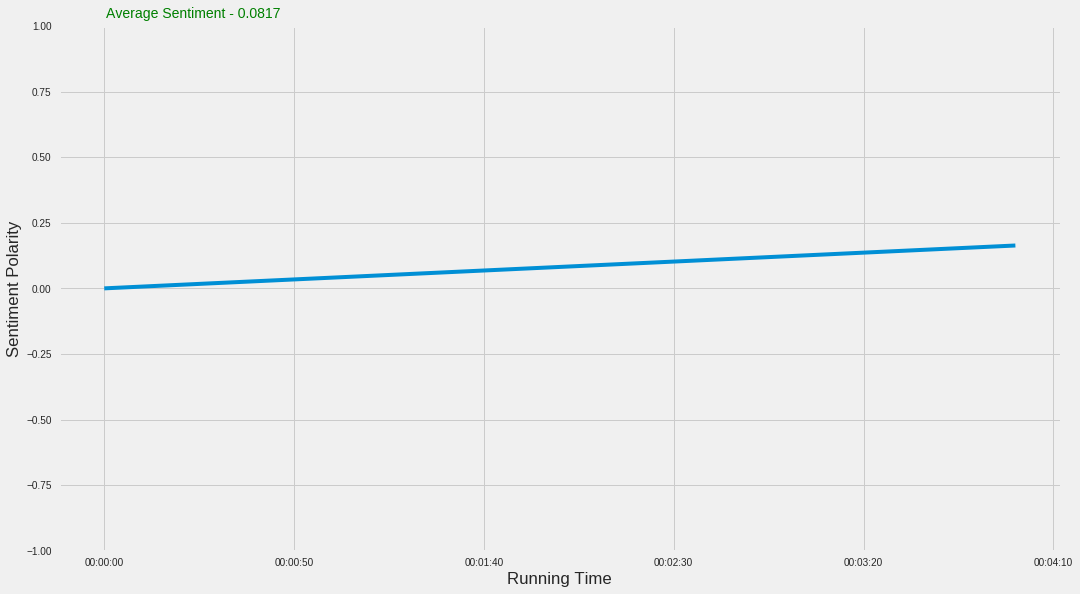

In [34]:
x, y = get_sentiment(file)
fig, ax = plt.subplots()
plt.plot(x, y)
#plt.title(file, fontsize=32)
plt.ylim((-1, 1))
plt.ylabel("Sentiment Polarity")
plt.xlabel("Running Time")
plt.text(.5, 1.03, "Average Sentiment - " + str(round(average(y), 4)), color="green")
#ttl = ax.title
ttl.set_position([.5, 1.05])

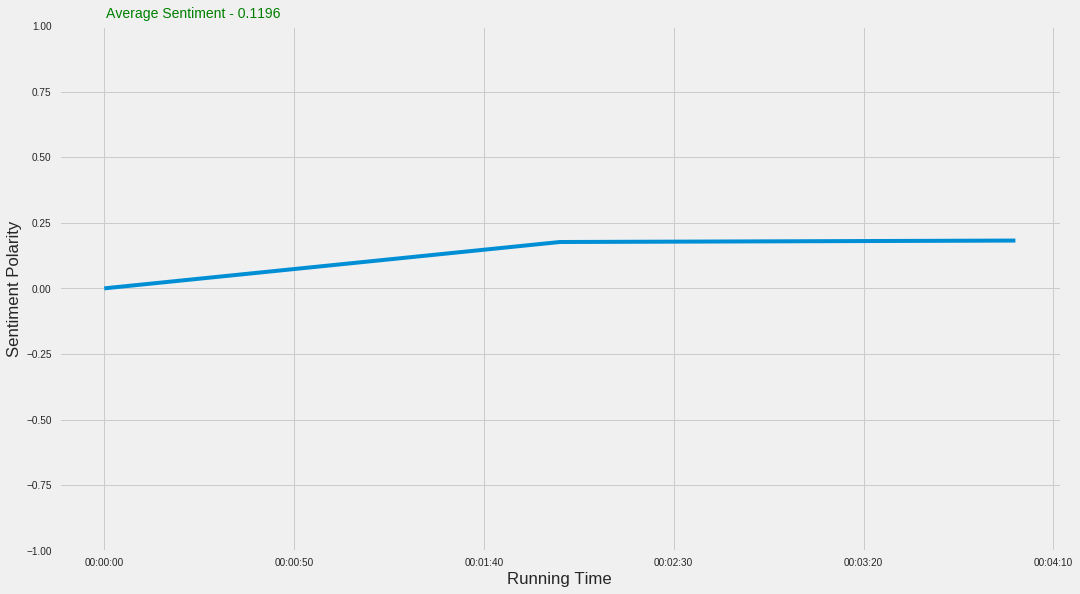